In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy.stats.mstats import mquantiles
import subprocess
import glob

Theoretical growth rate from approximation in Carroll, Press & Turner paper

In [2]:
Omega_m = 0.307115
Omega_k = 0.
Omega_l = 1. - Omega_m
h = 0.6777
z = 0.52
x = Omega_m*(1 + z)**3 - (Omega_m + Omega_l -1.)*(1 + z)**2 + Omega_l
f = ((Omega_m*(1 + z)**3)/(x))**(4/7)
print(f)

0.7531194293831189


Analysing the Power Spectrum data

In [3]:
Pk_truepos_gals = np.loadtxt('/home/icgguest/Desktop/Pk/PP_truepos_gals_Pk_1175.txt')
Pk_specz_gals = np.loadtxt('/home/icgguest/Desktop/Pk/PP_specz_gals_Pk_1175.txt')
Pk_delta = np.loadtxt('/home/icgguest/Desktop/Pk/BigMDPl_Delta_z052_Pk_1175.txt')
kdata = Pk_specz_gals[:,0].reshape(587, 1)
Pk_truepos_gals = Pk_truepos_gals[:,1].reshape(587, 1)
Pk_specz_gals = Pk_specz_gals[:,1].reshape(587, 1)
Pk_delta = Pk_delta[:,1].reshape(587, 1)
# choose_k = kdata>0
choose_k = (kdata < 0.07)
kvalues = kdata[choose_k]
Pk_truepos_gals = Pk_truepos_gals[choose_k]
Pk_specz_gals = Pk_specz_gals[choose_k]
Pk_delta = Pk_delta[choose_k]

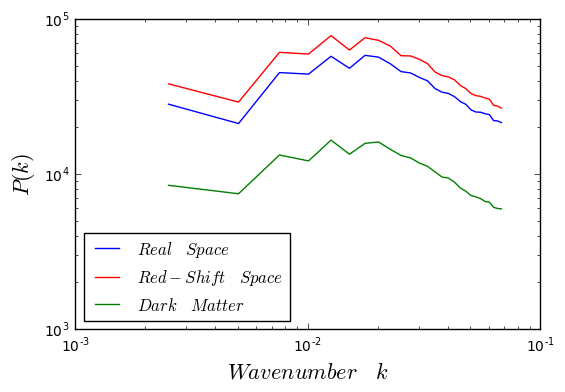

In [4]:
plt.plot(kvalues, Pk_truepos_gals, color= 'blue', label = r'$Real \quad Space$')
plt.plot(kvalues, Pk_specz_gals, color = 'red', label = r'$Red-Shift \quad Space$')
plt.plot(kvalues, Pk_delta, color = 'green', label = r'$Dark \quad Matter$')
plt.xlabel(r'$Wavenumber \quad k$', size = '16')
plt.ylabel(r'$ P(k)$', size = '16')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 3)
plt.show()

Evaluating the beta function by linear fitting the Power Spectrum in real and red-shift space

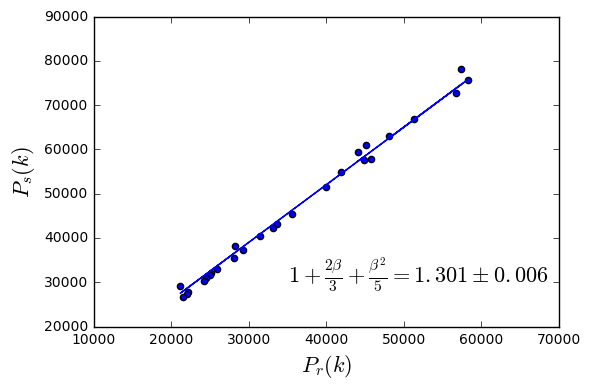

In [5]:
def linear(x,m):
    return m *x
popt, pcov = curve_fit(linear, Pk_truepos_gals, Pk_specz_gals)
plt.plot(Pk_truepos_gals, linear(Pk_truepos_gals, popt))
plt.scatter(Pk_truepos_gals,Pk_specz_gals)
plt.xlabel(r'$P_{r}(k)$', size = '16')
plt.ylabel(r'$P_{s}(k)$',  size = '16')
perr = np.sqrt(pcov)
plt.annotate(r'$1 + \frac{2 \beta}{3} + \frac{\beta^2}{5} = %0.3f \pm %0.3f$' %(popt, perr), xy = (35000, 30000), size = '16')
plt.show()

Evaluating the bias and beta by linear fitting the matter and red-shift space Power Spectrum

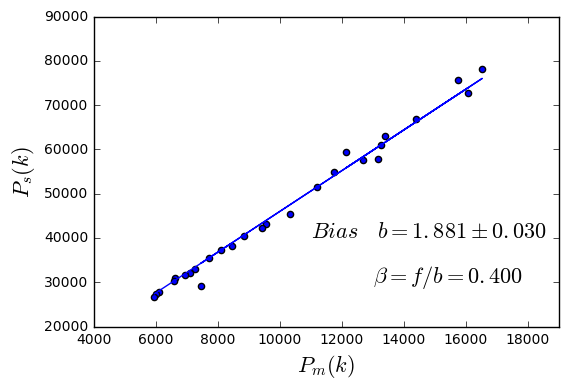

In [6]:
popt1, pcov1 = curve_fit(linear, Pk_delta, Pk_specz_gals)
plt.plot(Pk_delta, linear(Pk_delta, popt1))
plt.scatter(Pk_delta, Pk_specz_gals)
plt.xlabel(r'$P_{m}(k)$',  size = '16')
plt.ylabel(r'$P_{s}(k)$',  size = '16')
bias = np.sqrt(popt1/popt)
perr1 = np.sqrt(pcov1)
beta = f/bias
plt.annotate(r'$ Bias\quad b = %0.3f \pm %0.3f$' %(bias,perr1), xy = (11000, 40000), size = '16')
plt.annotate(r'$\beta =  f/b = %0.3f$' %beta, xy = (13000, 30000), size = '16')
plt.xlim(4000,19000)
plt.show()

Evaluating beta by solving the quadratic beta function and obtaining an effective f

In [7]:
determinant = np.sqrt(((2/3)**2) + (4 *(1/5)*0.301))
beta_new =  (-(2/3) + determinant)/(2/5)
f_new = beta_new *bias

l = (1 + (2*beta_new)/3 + (beta_new**2)/5 - 1.301)
print(beta_new/beta,f_new/f,l)

[ 1.00586256] [ 1.00586256] 0.0


Checking that for this value of beta the monopole and the power spectrum match

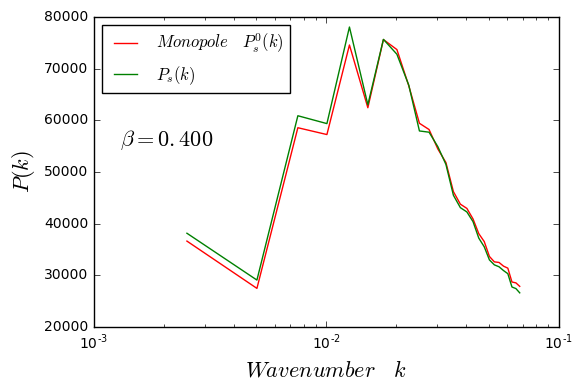

In [8]:
Pk_test = ((1 + (2*beta)/3 + (beta**2)/5) * Pk_truepos_gals)
plt.plot(kvalues, Pk_test, color='red', label = r'$Monopole \quad P_{s}^{0}(k)$')
plt.plot(kvalues, Pk_specz_gals, color= 'green', label = r'$P_{s}(k)$')
plt.annotate(r'$\beta = %0.3f$' %beta, xy = (0.0013, 55000), size = '16')
plt.xscale('log')
plt.ylabel(r'$P(k)$',  size = '16')
plt.xlabel(r'$Wavenumber \quad k$',  size = '16')
plt.legend(loc = 2)
plt.show()

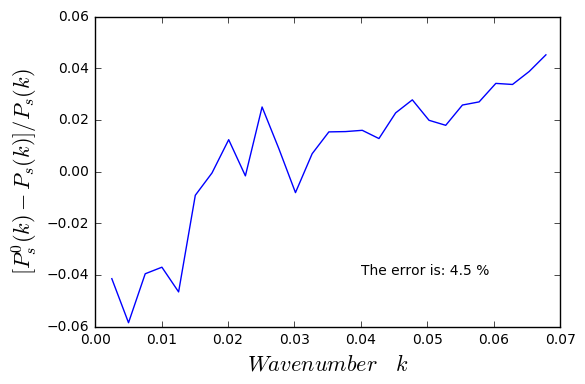

In [9]:
plt.plot(kvalues, (Pk_test - Pk_specz_gals)/Pk_test)
plt.ylabel(r'$[P_{s}^{0}(k)- P_{s}(k)]/P_{s}(k)$', size = '16')
plt.xlabel(r'$Wavenumber \quad k$', size = '16')
error = ((Pk_test - Pk_specz_gals)/Pk_test).max()*100
plt.annotate('The error is: %0.1f %%' %error, xy= (0.04,-0.04))
plt.show()

Analysing Correlation function data

In [10]:
baryC = False

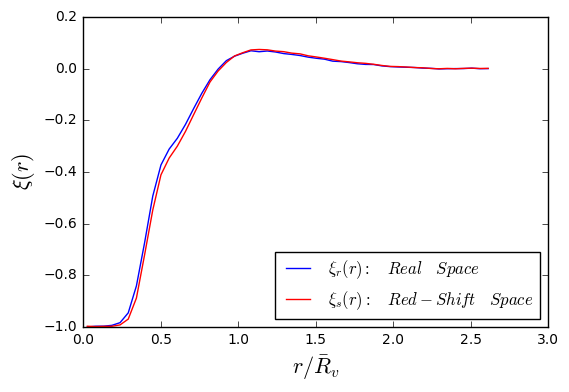

In [21]:
if baryC is True:
    RealSpdg = np.load('/home/icgguest/Desktop/RSD/profiles/PP_speczVoidsbaryC_all_truedg.npy')
    RealSpdg_cumul = np.load('/home/icgguest/Desktop/RSD/profiles/PP_speczVoidsbaryC_all_truedg_cumul.npy')
    RedSpdg = np.load('/home/icgguest/Desktop/RSD/profiles/PP_speczVoidsbaryC_all_speczdg.npy')
    RedSpdg_cumul = np.load('/home/icgguest/Desktop/RSD/profiles/PP_speczVoidsbaryC_all_speczdg_cumul.npy')
    void_cat = np.loadtxt('/home/icgguest/Desktop/RSD/catalogues/Plane_par_specz_Voids_baryC_cat.txt')
else:
    RealSpdg = np.load('/home/icgguest/Desktop/RSD/profiles/PP_speczVoids_all_truedg.npy')
    RealSpdg_cumul = np.load('/home/icgguest/Desktop/RSD/profiles/PP_speczVoids_all_truedg_cumul.npy')
    RedSpdg = np.load('/home/icgguest/Desktop/RSD/profiles/PP_speczVoids_all_speczdg.npy')
    RedSpdg_cumul = np.load('/home/icgguest/Desktop/RSD/profiles/PP_speczVoids_all_speczdg_cumul.npy')
    void_cat = np.loadtxt('/home/icgguest/Desktop/RSD/catalogues/Plane_par_specz_Voids_cat.txt')
    
rvals = RealSpdg[:,0]
RealSpdg = RealSpdg[:,1:]
RedSpdg = RedSpdg[:,1:]

RealSpdg_cumul = RealSpdg_cumul[:,1:]
RedSpdg_cumul = RedSpdg_cumul[:,1:]

RedSpdg_mean = np.mean(RedSpdg, axis = 1)
RealSpdg_mean = np.mean(RealSpdg, axis = 1)

plt.plot(rvals/np.mean(void_cat[:,4]), RealSpdg_mean, color = 'blue', label= r'$\xi_{r}(r): \quad Real \quad Space$')
plt.plot(rvals/np.mean(void_cat[:,4]), RedSpdg_mean, color = 'red', label= r'$\xi_{s}(r): \quad Red-Shift \quad Space$')
plt.ylabel(r'$\xi(r)$', size = '16')
plt.xlabel(r'$r/\barR_{v}$', size = '16')
plt.legend(loc = 4)
plt.show()

Testing expression for the monopole using the previously found value of beta

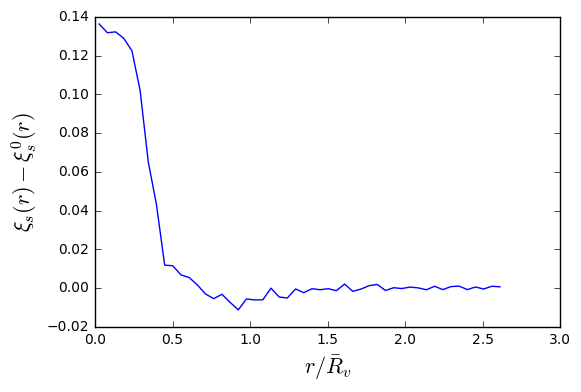

In [12]:
xi_0 = (1 + beta/3)* RealSpdg_mean

plt.plot(rvals/np.mean(void_cat[:,4]), RedSpdg_mean - xi_0)
plt.ylabel(r'$\xi_{s}(r) - \xi_{s}^{0}(r)$', size = '16')
plt.xlabel(r'$r/\bar{R}_{v}$', size = '16')
plt.show()

Relation between minimum density and voids radius size

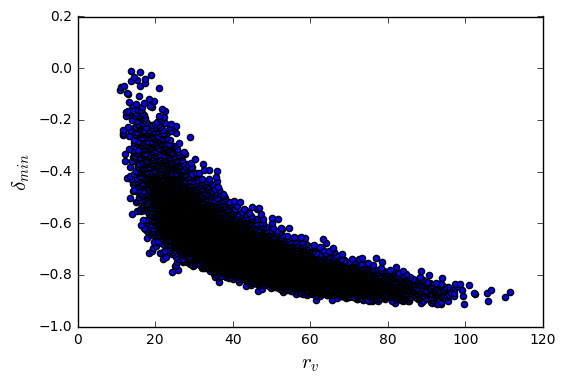

In [13]:
plt.scatter(void_cat[:,4], void_cat[:,6])
plt.xlabel(r'$r_{v}$',size = '15')
plt.ylabel(r'$\delta_{min}$', size = '15')
plt.show()

Generating voids sub-samples depending on voids radius Rv, minumum density dmin, lambda factor 

In [15]:
Rv_sample = False
dmin_sample = False
lambda_sample = True
dens_ratio = False
delta_average = False

if Rv_sample is True:
    param_cat = void_cat[:,4]
    label = 'R_{void}'
    
if dmin_sample is True:
    param_cat = void_cat[:,6]
    label = '\delta_{min}'
    
if lambda_sample is True:
    param_cat = void_cat[:,8]
    label = '\lambda_{void}'
    
if dens_ratio is True:
    param_cat = void_cat[:,10]
    label = '\delta_{ratio}'
    
if delta_average is True:
    param_cat = void_cat[:,7]
    label = '\delta_{avg}'
    
quantile = mquantiles(param_cat, prob = [0., 6000/30007,12000/30007, 18000/30007, 24000/30007 ,1.])

sample = 5

if sample is 1:
    min_value = quantile[0]
    max_value = quantile[1]
if sample is 2:
    min_value = quantile[1]
    max_value = quantile[2]
if sample is 3:
    min_value = quantile[2]
    max_value = quantile[3]
if sample is 4:
    min_value = quantile[3]
    max_value = quantile[4]
if sample is 5:
    min_value = quantile[4]
    max_value = quantile[5]

    
select = (param_cat > min_value)&(param_cat < max_value)


Plotting RSD data by different samples

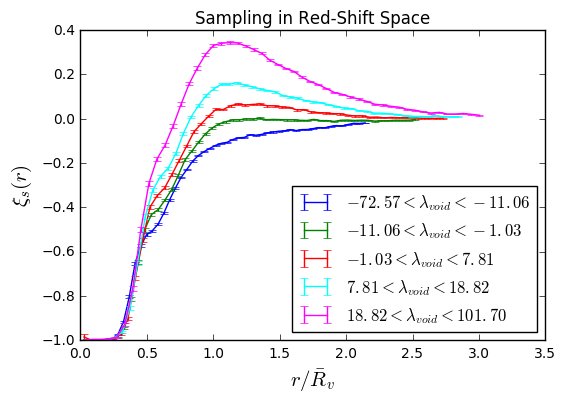

In [16]:
select1 = (param_cat >quantile[0])&(param_cat <quantile[1])
RedSpdg_1 = np.mean(RedSpdg[:,select1],axis=1).reshape(50,1)
RedSpdg_std1 = np.array(RedSpdg[:,select1]).std(1)/np.sqrt(np.sum(select1))
select2 = (param_cat >quantile[1])&(param_cat <quantile[2])
RedSpdg_2 = np.mean(RedSpdg[:,select2],axis=1)
RedSpdg_std2 = np.array(RedSpdg[:,select2]).std(1)/np.sqrt(np.sum(select2))
select3 = (param_cat >quantile[2])&(param_cat <quantile[3])
RedSpdg_3 = np.mean(RedSpdg[:,select3],axis=1)
RedSpdg_std3 = np.array(RedSpdg[:,select3]).std(1)/np.sqrt(np.sum(select3))
select4 = (param_cat >quantile[3])&(param_cat <quantile[4])
RedSpdg_4 = np.mean(RedSpdg[:,select4],axis=1)
RedSpdg_std4 = np.array(RedSpdg[:,select4]).std(1)/np.sqrt(np.sum(select4))
select5 = (param_cat >quantile[4])&(param_cat <quantile[5])
RedSpdg_5 = np.mean(RedSpdg[:,select5],axis=1)
RedSpdg_std5 = np.array(RedSpdg[:,select5]).std(1)/np.sqrt(np.sum(select5))

plt.errorbar(rvals/np.mean(void_cat[select1, 4]), RedSpdg_1, RedSpdg_std1, color = 'blue', label = r'$%0.2f < %s < %0.2f$' %(quantile[0],label, quantile[1]))
plt.errorbar(rvals/np.mean(void_cat[select2, 4]), RedSpdg_2, RedSpdg_std2, color = 'green', label = r'$%0.2f < %s < %0.2f$'%(quantile[1],label, quantile[2]))
plt.errorbar(rvals/np.mean(void_cat[select3, 4]), RedSpdg_3, RedSpdg_std3, color = 'red', label = r'$%0.2f < %s < %0.2f$' %(quantile[2],label, quantile[3]))
plt.errorbar(rvals/np.mean(void_cat[select4, 4]), RedSpdg_4, RedSpdg_std4, color = 'cyan', label = r'$%0.2f < %s < %0.2f$'%(quantile[3],label, quantile[4]))
plt.errorbar(rvals/np.mean(void_cat[select5, 4]), RedSpdg_5, RedSpdg_std5, color = 'magenta', label = r'$%0.2f < %s < %0.2f$'%(quantile[4],label, quantile[5]))
plt.ylabel(r'$\xi_{s}(r)$', size = '15')
plt.xlabel(r'$r/\bar{R}_{v}$', size= '15')
plt.legend(loc = 4)
plt.title('Sampling in Red-Shift Space')
plt.show()

Checking validity of approximation xi = delta* b for different samplings

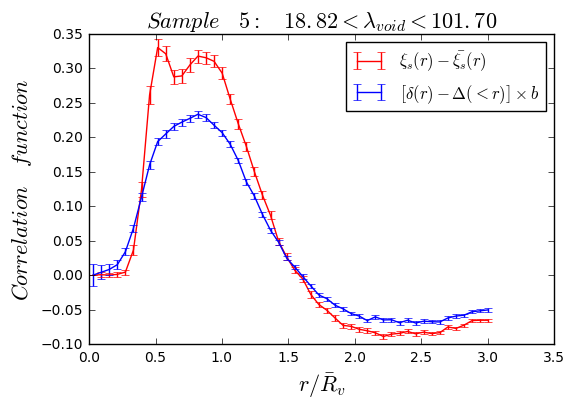

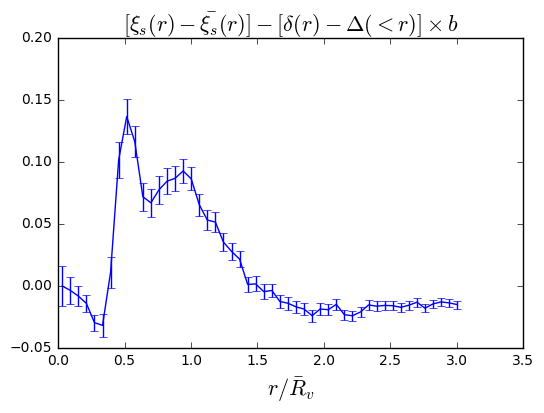

In [17]:
if baryC is True:
    RedSpdg_cumul = np.load('/home/icgguest/Desktop/RSD/profiles/PP_speczVoidsbaryC_all_speczdg_cumul.npy')
    RedSpdg = np.load('/home/icgguest/Desktop/RSD/profiles/PP_speczVoidsbaryC_all_speczdg.npy')
    delta = np.load('/home/icgguest/Desktop/RSD/profiles/PP_specz_Voids_baryC_all_dm.npy')
    Delta = np.load('/home/icgguest/Desktop/RSD/profiles/PP_specz_Voids_baryC_all_dm_cumul.npy')
else:
    RedSpdg_cumul = np.load('/home/icgguest/Desktop/RSD/profiles/PP_speczVoids_all_speczdg_cumul.npy')
    RedSpdg = np.load('/home/icgguest/Desktop/RSD/profiles/PP_speczVoids_all_speczdg.npy')
    delta = np.load('/home/icgguest/Desktop/RSD/profiles/PP_specz_Voids_all_dm.npy')
    Delta = np.load('/home/icgguest/Desktop/RSD/profiles/PP_specz_Voids_all_dm_cumul.npy')
    
RedSpdg_cumul= RedSpdg_cumul[:,1:]
RedSpdg = RedSpdg[:,1:]
delta = delta[:,1:]
Delta = Delta[:,1:]


Sample = True

if Sample is True:
    RedSpdg_cumul_mean = np.mean(RedSpdg_cumul[:,select],axis=1)
    RedSpdg_cumul_std = np.array(RedSpdg_cumul[:,select]).std(1)/np.sqrt(np.sum(select))
    RedSpdg_mean = np.mean(RedSpdg[:,select], axis = 1)
    RedSpdg_std = np.array(RedSpdg[:,select]).std(1)/np.sqrt(np.sum(select))
    delta_mean = np.mean(delta[:,select], axis = 1)
    delta_std = np.array(delta[:,select]).std(1)/np.sqrt(np.sum(select))
    Delta_mean = np.mean(Delta[:,select], axis = 1)
    Delta_std = np.array(Delta[:,select]).std(1)/np.sqrt(np.sum(select))
    xi_diff = (RedSpdg_mean - RedSpdg_cumul_mean)
    xi_diff_std = np.sqrt(RedSpdg_std**2 + RedSpdg_cumul_std**2)
    delta_diff = (delta_mean - Delta_mean) * bias
    delta_diff_std = np.sqrt((delta_std**2 + Delta_std**2) *bias)
    plt.figure(1)
    plt.errorbar(rvals/(np.mean(void_cat[select,4])), xi_diff,xi_diff_std, color = 'red', label = r'$\xi_{s}(r) - \bar{\xi_{s}}(r)$')
    plt.errorbar(rvals/(np.mean(void_cat[select,4])), delta_diff, delta_diff_std, color = 'blue', label = r'$\left[\delta(r) - \Delta(<r)\right] \times b$')
    plt.legend(loc = 1)
    plt.xlabel(r'$r/\bar{R}_{v}$', size = '16')
    plt.ylabel(r'$Correlation \quad function$', size = '16')
    plt.title(r'$Sample \quad %d: \quad %0.2f < %s < %0.2f$' %(sample,min_value, label, max_value ), size ='16')
    plt.figure(2)    
    plt.errorbar(rvals/(np.mean(void_cat[select,4])), xi_diff - delta_diff, np.sqrt(xi_diff_std**2 + delta_diff_std**2))
    plt.xlabel(r'$r/\bar{R}_{v}$', size = '16')
    plt.title(r'$[\xi_{s}(r) - \bar{\xi_{s}}(r)] - [\delta(r) - \Delta(<r)] \times b$', size = '16')
if Sample is False:
    RedSpdg_cumul_mean = np.mean(RedSpdg_cumul, axis = 1)
    RedSpdg_cumul_std = np.array(RedSpdg_cumul).std(1)/np.sqrt(len(RedSpdg_cumul))
    RedSpdg_mean = np.mean(RedSpdg, axis = 1)
    RedSpdg_std = np.array(RedSpdg).std(1)/np.sqrt(len(RedSpdg))
    delta_mean = np.mean(delta, axis = 1)
    delta_std = np.array(delta).std(1)/np.sqrt(len(delta))
    Delta_mean = np.mean(Delta, axis = 1)
    Delta_std = np.array(Delta).std(1)/np.sqrt(len(Delta))
    xi_diff = (RedSpdg_mean - RedSpdg_cumul_mean)
    xi_diff_std = np.sqrt(RedSpdg_std**2 + RedSpdg_cumul_std**2)
    delta_diff = (delta_mean - Delta_mean) * bias
    delta_diff_std = np.sqrt((delta_std**2 + Delta_std**2) *bias)
    plt.figure(1)
    plt.errorbar(rvals/(np.mean(void_cat[:,4])), xi_diff,xi_diff_std, color = 'red', label = r'$\xi_{s}(r) - \bar{\xi_{s}}(r)$')
    plt.errorbar(rvals/(np.mean(void_cat[:,4])), delta_diff, delta_diff_std, color = 'blue', label = r'$\left[\delta(r) - \Delta(<r)\right] \times b$')
    plt.legend(loc = 1)
    plt.xlabel(r'$r/\bar{R}_{v}$', size = '16')
    plt.ylabel(r'$Correlation \quad function$', size = '16')
    plt.figure(2)    
    plt.errorbar(rvals/(np.mean(void_cat[:,4])), xi_diff - delta_diff, np.sqrt(xi_diff_std**2 + delta_diff_std**2))
    plt.xlabel(r'$r/\bar{R}_{v}$', size = '16')
    plt.title(r'$[\xi_{s}(r) - \bar{\xi_{s}}(r)] - [\delta(r) - \Delta(<r)] \times b$', size = '16')
count = 0
if Sample is all:
    for sample in range(1, 6):
        if sample is 1:
            min_value = quantile[0]
            max_value = quantile[1]
        if sample is 2:
            min_value = quantile[1]
            max_value = quantile[2]
        if sample is 3:
            min_value = quantile[2]
            max_value = quantile[3]
        if sample is 4:
            min_value = quantile[3]
            max_value = quantile[4]
        if sample is 5:
            min_value = quantile[4]
            max_value = quantile[5]
        select_a = (param_cat > min_value)&(param_cat < max_value)
        RedSpdg_cumul_mean_a = np.mean(RedSpdg_cumul[:,select_a],axis=1)
        RedSpdg_cumul_std_a = np.array(RedSpdg_cumul[:,select_a]).std(1)/np.sqrt(np.sum(select_a))
        RedSpdg_mean_a = np.mean(RedSpdg[:,select_a], axis = 1)
        RedSpdg_std_a = np.array(RedSpdg[:,select_a]).std(1)/np.sqrt(np.sum(select_a))
        delta_mean_a = np.mean(delta[:,select_a], axis = 1)
        delta_std_a = np.array(delta[:,select_a]).std(1)/np.sqrt(np.sum(select_a))
        Delta_mean_a = np.mean(Delta[:,select_a], axis = 1)
        Delta_std_a = np.array(Delta[:,select_a]).std(1)/np.sqrt(np.sum(select_a))
        xi_diff_a = (RedSpdg_mean_a - RedSpdg_cumul_mean_a)
        xi_diff_std_a = np.sqrt(RedSpdg_std_a**2 + RedSpdg_cumul_std_a**2)
        delta_diff_a = (delta_mean_a - Delta_mean_a) * bias
        delta_diff_std_a = np.sqrt((delta_std_a**2 + Delta_std_a**2) *bias)
        count_out = count + 1
        plt.figure(1)
        plt.errorbar(rvals/(np.mean(void_cat[select,4])), xi_diff_a, xi_diff_std_a, label = r'$Sample \quad %d: \quad %0.2f < %s < %0.2f$' %(count_out,min_value, label, max_value))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xlabel(r'$r/\bar{R}_{v}$', size = '16')
        plt.ylabel(r'$\xi_{s}(r) - \bar{\xi_{s}}(r)$', size = '16')
        plt.figure(2)
        plt.errorbar(rvals/(np.mean(void_cat[select,4])), delta_diff_a, delta_diff_std_a) #, label = r'$Sample \quad %d: \quad %0.2f < %s < %0.2f$' %(count_out,min_value, label, max_value))
#         plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xlabel(r'$r/\bar{R}_{v}$', size = '16')
        plt.ylabel(r'$\left[\delta(r) - \Delta(<r)\right] \times b $', size = '16')
        plt.figure(3)
        plt.errorbar(rvals/(np.mean(void_cat[select,4])), xi_diff_a - delta_diff_a, np.sqrt(xi_diff_std_a**2 + delta_diff_std_a**2)) #,label = r'$Sample \quad %d: \quad %0.2f < %s < %0.2f$' %(count_out,min_value, label, max_value))
#         plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xlabel(r'$r/\bar{R}_{v}$', size = '16')
        plt.title(r'$[\xi_{s}(r) - \bar{\xi_{s}}(r)] - [\delta(r) - \Delta(<r)] \times b$', size = '16')
        count+=1
plt.show()

Creating txt file to run CUTE_box and evaluate the Cross-Correlation function

In [35]:
'change sample number in select statement & adjust param.ini file!!!'
void_coord = void_cat[:,1:4]
void_coord_sample = void_coord[select, :]
np.savetxt('/home/icgguest/Desktop/RSD/CUTE_coordinates.txt', void_coord_sample)

command = ['/home/icgguest/Desktop/CUTE-1.3/CUTE_box/./CUTE_box', '/home/icgguest/Desktop/CUTE-1.3/CUTE_box/test/params.ini']
process = subprocess.run(command)

In [12]:
void_baryC = np.loadtxt('/home/icgguest/Desktop/RSD/catalogues/Plane_par_specz_Voids_baryC_cat.txt')
void_coord = void_baryC[:,1:4]
np.savetxt('/home/icgguest/Desktop/RSD/CUTE_coordinates.txt', void_coord)

Loading CUTE file containing r, mu D1D2 and D1R counts only.
Reusing random counts D2R RR--> Generating xi(r,mu) and creating new complete files

In [36]:
'Change file name to be saved before running this!!!'

Sample_file = np.loadtxt('/home/icgguest/Desktop/RSD/CUTE_paircounts.txt')

if baryC is True:
    N1 = 30007
else:
    N1 = np.sum(select)
# N1 = 30007

Specz = np.loadtxt('/home/icgguest/Desktop/RSD/CCF_new/CCFrmu_truevoids_speczgals.txt')
D1D2 = Sample_file[:,4]
D1R = Sample_file[:,5]
D2R = Specz[:,6]
RR = Specz[:,7]


N2 = 3124629
Nr= 31246290

D1D2 = D1D2/(N1*N2)
D1R = D1R/(N1*Nr)
D2R = D2R/(N2*Nr)
RR = 2* RR/(Nr*(Nr-1))

xi_rmu = (D1D2 - D1R - D2R + RR)/RR

file = np.zeros((3000, 8))
file[:,0] = Sample_file[:,0]
file[:,1] = Sample_file[:,1]
file[:,2] = xi_rmu
file[:,4] = Sample_file[:,4]
file[:,5] = Sample_file[:,5]
file[:,6] = Specz[:,6]
file[:,7] = Specz[:,7]

np.savetxt('/home/icgguest/Desktop/RSD/FULL_CCF/PP_baryC_sample5_CCF_full.txt', file, fmt='%0.6f')

Loading new complete files to proceed with the data analysis

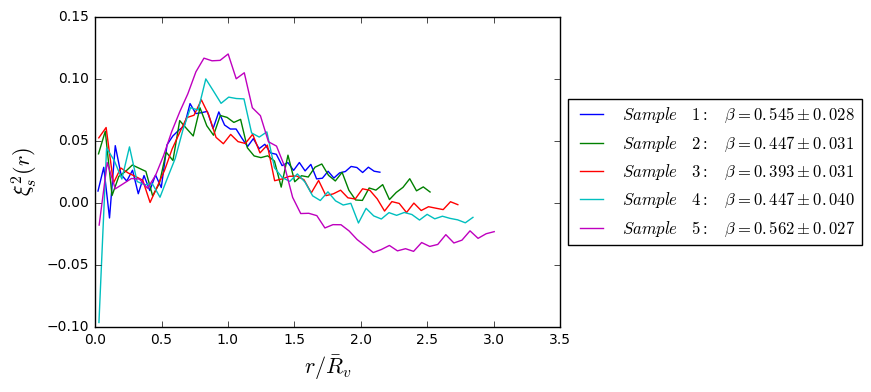

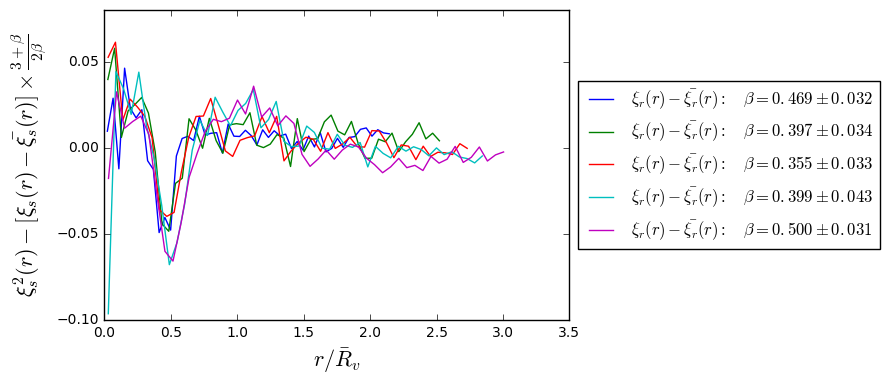

In [18]:
Files = glob.glob('/home/icgguest/Desktop/RSD/FULL_CCF/PP_lambda*_CCF_full.txt')

count = 0
i = 0
for file in Files:
    df1=np.loadtxt(file)
    r = df1[::50,0]
    xi_rmu = df1[:,2].reshape((50,60))
    y_rmu = df1[:60,1]
    P = (1./2)*(3*(y_rmu**2) - 1)
    quadr = xi_rmu*P
    quadrupole = 5 * np.trapz(quadr, y_rmu)
    min_value = quantile[i]
    max_value = quantile[i +1]
    select = (param_cat > min_value)&(param_cat < max_value)
    
    RealSpdg_cumul_mean = np.mean(RealSpdg_cumul[:,select],axis=1)
    RealSpdg_mean = np.mean(RealSpdg[:,select], axis = 1)
    xi_diff_real = (RealSpdg_mean - RealSpdg_cumul_mean)
    
    RedSpdg_cumul_mean = np.mean(RedSpdg_cumul[:,select],axis=1)
    RedSpdg_mean = np.mean(RedSpdg[:,select], axis = 1)
    xi_diff_red = (RedSpdg_mean - RedSpdg_cumul_mean)
    
    popt1, pcov1 = curve_fit(linear, xi_diff_real, quadrupole)
    perr1 = np.sqrt(np.diag(pcov1))
    beta1 = popt1 *(3/2)
    berr1 = perr1*(3/2)
    popt2, pcov2 = curve_fit(linear, xi_diff_red, quadrupole)
    perr2 = np.sqrt(np.diag(pcov2))
    beta2 = (3 *popt2)/(2 - popt2) 
    berr2 = (3*perr2)/(2 - perr2)
    count_out = count + 1
    plt.figure(1)
    plt.plot(rvals/np.mean(void_cat[select,4]),quadrupole, 
             label = r'$Sample \quad %d: \quad \beta = %0.3f \pm %0.3f $'%(count_out, beta2, berr2))
    plt.xlabel(r'$r/\bar{R}_{v}$', size = '16')
    plt.ylabel(r'$\xi_{s}^{2}(r)$', size = '16')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.figure(2)
    plt.plot(rvals/(np.mean(void_cat[select,4])),quadrupole - (popt2*xi_diff_red), 
             label = r'$\xi_{r}(r)-\bar{\xi_{r}}(r): \quad\beta = %0.3f \pm %0.3f $'%(beta1, berr1))
    plt.xlabel(r'$r/\bar{R}_{v}$', size = '16')
    plt.ylabel(r'$\xi_{s}^{2}(r) - [\xi_{s}(r) - \bar{\xi_{s}}(r)]\times \frac{3 + \beta}{2\beta}$', size = '16')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    count+=1
    i +=1
plt.show()


Plot of xi(r, mu)

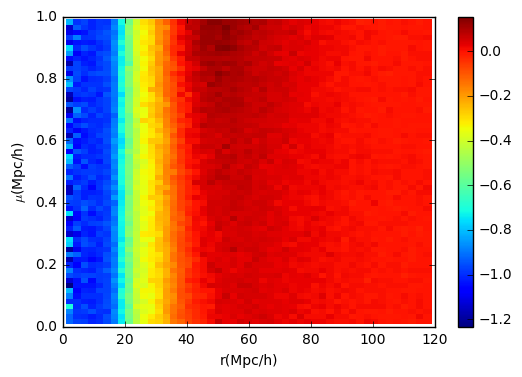

In [19]:
CCF_file = np.loadtxt('/home/icgguest/Desktop/RSD/FULL_CCF/CCFrmu_speczvoids_speczgals.txt')
xi_rmu = CCF_file[:,2].reshape(50,60)
x_rmu = CCF_file[::60,0]
y_rmu = CCF_file[:60,1]
plt.pcolormesh(x_rmu, y_rmu, xi_rmu.transpose())
plt.colorbar()
plt.xlabel('r(Mpc/h)')
plt.ylabel(r'$\mu$(Mpc/h)')
plt.show()

Evaluating monopole and quadrupole form xi(r, mu)

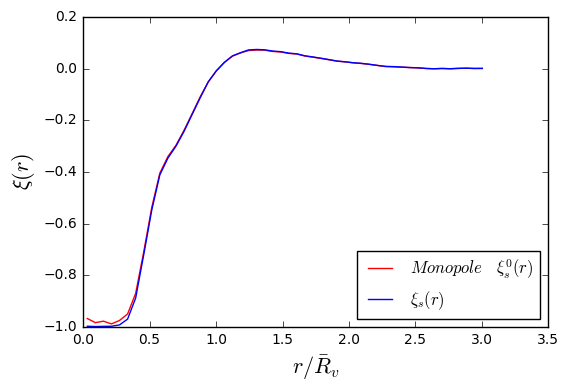

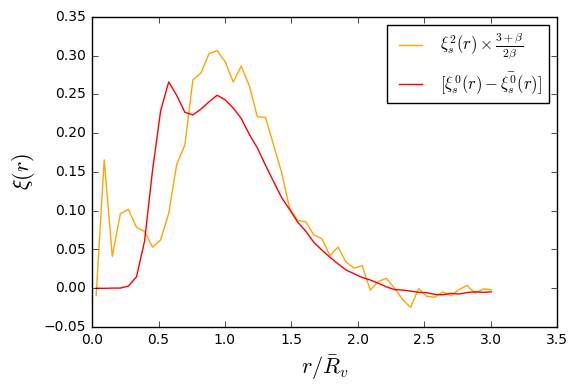

In [24]:
mono = xi_rmu*1
monopole = np.trapz(mono, y_rmu)

# RedSpdg_mean = np.mean(RedSpdg[:,select], axis = 1)
# RedSpdg_cumul_mean = np.mean(RedSpdg_cumul[:,select],axis=1)
RedSpdg_mean = np.mean(RedSpdg, axis = 1)
RedSpdg_cumul_mean = np.mean(RedSpdg_cumul,axis=1)
xi_diff_red = (RedSpdg_mean - RedSpdg_cumul_mean)

# RealSpdg_mean = np.mean(RealSpdg[:,select], axis = 1)
# RealSpdg_cumul_mean = np.mean(RealSpdg_cumul[:,select],axis=1)
RealSpdg_mean = np.mean(RealSpdg, axis = 1)
RealSpdg_cumul_mean = np.mean(RealSpdg_cumul, axis = 1)
xi_diff_real = (RealSpdg_mean - RealSpdg_cumul_mean)

plt.plot(rvals/(np.mean(void_cat[select,4])),monopole, color = 'red', label = r'$Monopole \quad \xi_{s}^{0}(r)$')
plt.plot(rvals/(np.mean(void_cat[select,4])), RedSpdg_mean, color = 'blue', label= r'$\xi_{s}(r)$')
plt.legend(loc = 4)
plt.xlabel(r'$r/\bar{R}_{v}$', size = '16')
plt.ylabel(r'$\xi(r)$', size = '16')
plt.show()

P = (1./2)*(3*(y_rmu**2) - 1)
quadr = xi_rmu*P
quadrupole = 5 * np.trapz(quadr, y_rmu)

plt.plot(rvals/(np.mean(void_cat[select,4])), quadrupole/popt,color = 'orange', 
         label= r'$\xi_{s}^{2}(r) \times \frac{3+ \beta}{2\beta}$')
plt.plot(rvals/(np.mean(void_cat[select,4])), xi_diff_red, color = 'red', 
         label = r'$[\xi_{s}^{0}(r) - \bar{\xi_{s}^{0}}(r)] $')
plt.legend(loc = 1)
plt.xlabel(r'$r/\bar{R}_{v}$', size = '16')
plt.ylabel(r'$\xi(r)$', size = '16')
plt.show()

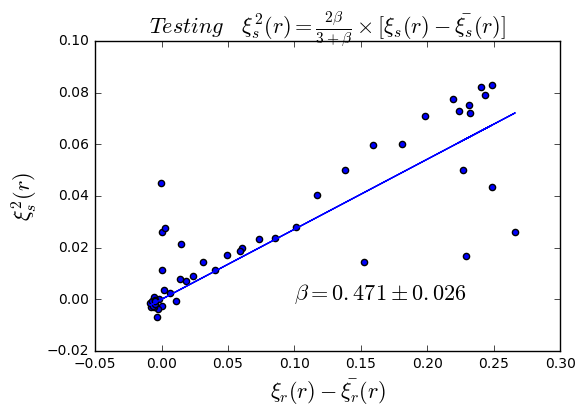

In [23]:
popt, pcov = curve_fit(linear, xi_diff_red, quadrupole)
perr = np.sqrt(np.diag(pcov))
beta = (3 *popt)/(2 - popt)
berr = (3 *perr)/(2 - perr)
plt.plot(xi_diff_red, linear(xi_diff_red, popt))
plt.scatter(xi_diff_red, quadrupole)
plt.annotate(r'$\beta = %0.3f \pm %0.3f$' %(beta, berr), xy =(0.1, -0.00), size = '16')
plt.title(r'$Testing \quad \xi_{s}^{2}(r) = \frac{2 \beta}{3+ \beta} \times [\xi_{s}(r) - \bar{\xi_{s}}(r)]$', 
          size = '16')
plt.xlabel(r'$\xi_{r}(r) - \bar{\xi_{r}}(r)$', size = '16')
plt.ylabel(r'$\xi_{s}^{2}(r)$', size = '16')
plt.show()

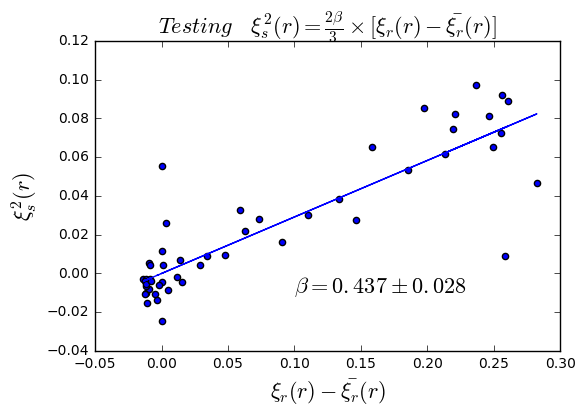

In [627]:
popt, pcov = curve_fit(linear, xi_diff_real, quadrupole)
perr = np.sqrt(np.diag(pcov))
beta = popt*(3/2)
berr = perr*(3/2)
plt.plot(xi_diff_real, linear(xi_diff_real, popt))
plt.scatter(xi_diff_real, quadrupole)
plt.annotate(r'$\beta = %0.3f \pm %0.3f$' %(beta, berr), xy =(0.1, -0.01), size = '16')
plt.title(r'$Testing \quad \xi_{s}^{2}(r) = \frac{2 \beta}{3} \times [\xi_{r}(r) - \bar{\xi_{r}}(r)]$', 
          size = '16')
plt.xlabel(r'$\xi_{r}(r) - \bar{\xi_{r}}(r)$', size = '16')
plt.ylabel(r'$\xi_{s}^{2}(r)$', size = '16')
plt.show()

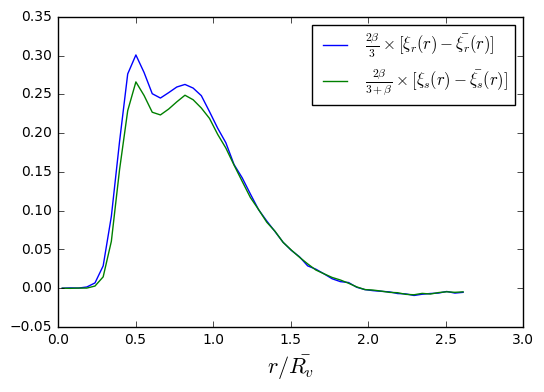

In [25]:
plt.plot(rvals/np.mean(void_cat[:,4]), xi_diff_real*(1+0.4/3), 
         label = r'$\frac{2 \beta}{3} \times [\xi_{r}(r) - \bar{\xi_{r}}(r)]$')
plt.plot(rvals/np.mean(void_cat[:,4]),xi_diff_red, 
         label = r'$\frac{2 \beta}{3+ \beta} \times [\xi_{s}(r) - \bar{\xi_{s}}(r)]$')
plt.legend(loc = 1)
plt.xlabel(r'$r/\bar{R_{v}}$', size = '16')
plt.show()

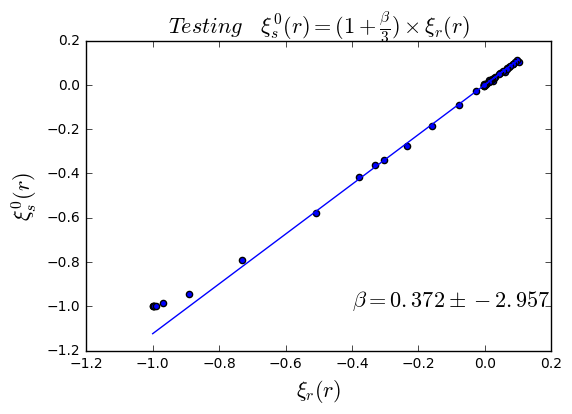

In [629]:
popt, pcov = curve_fit(linear, RealSpdg_mean[25:], RedSpdg_mean[25:])
perr = np.sqrt(np.diag(pcov))
beta2 = (popt-1)*3
b2err = (perr -1)*3
plt.plot(RealSpdg_mean, linear(RealSpdg_mean, popt))
plt.scatter(RealSpdg_mean, RedSpdg_mean)
plt.annotate(r'$\beta = %0.3f \pm %0.3f$' %(beta2, b2err), xy =(-0.4, -1), size = '16')
plt.title(r'$Testing \quad \xi_{s}^{0}(r) = (1 + \frac{\beta}{3}) \times \xi_{r}(r)$', size = '16')
plt.xlabel(r'$\xi_{r}(r)$', size = '16')
plt.ylabel(r'$\xi_{s}^{0}(r)$', size = '16')
plt.show()

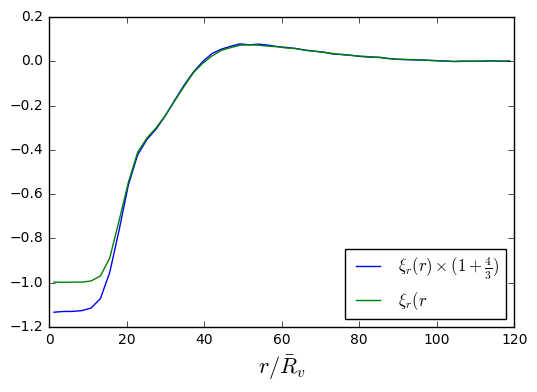

In [29]:
plt.plot(rvals,RealSpdg_mean*(1+0.4/3), label = r'$\xi_{r}(r) \times (1 + \frac{4}{3})$')
plt.plot(rvals,RedSpdg_mean, label = r'$\xi_{r}(r$')
plt.xlabel(r'$r/\bar{R}_{v}$', size = '16')
plt.legend(loc =4)
plt.show()

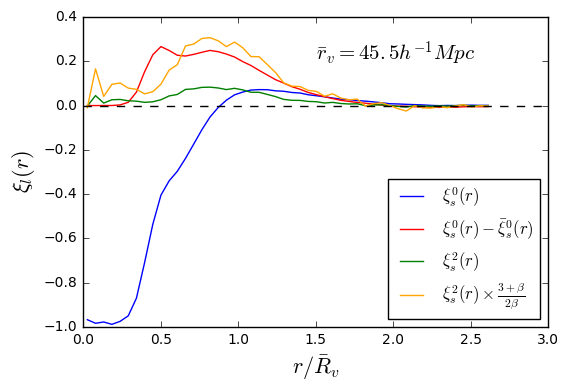

In [31]:
plt.plot(rvals/np.mean(void_cat[:,4]), monopole, color = 'blue', label = r'$\xi_{s}^{0}(r)$')
plt.plot(rvals/np.mean(void_cat[:,4]), RedSpdg_mean - RedSpdg_cumul_mean, color ='red', 
         label = r'$\xi_{s}^{0}(r) - \bar{\xi}_{s}^{0}(r)$')
plt.plot(rvals/np.mean(void_cat[:,4]), quadrupole, color = 'green', label = r'$\xi_{s}^{2}(r)$')
plt.plot(rvals/np.mean(void_cat[:,4]), quadrupole/popt, color = 'orange', 
         label = r'$\xi_{s}^{2}(r) \times \frac{3 + \beta}{2 \beta}$')
plt.legend(loc = 4)
y = np.zeros((60,1))
x = np.linspace(0, 3, 60)
plt.plot(x, y,'r--', color = 'black')
R_avg = np.mean(void_cat[:,4])
plt.annotate(r'$\bar{r}_{v} = %0.1f h^{-1}Mpc$' %R_avg, xy = (1.5, 0.2), size = '15')
plt.xlabel(r'$r/\bar{R}_{v}$', size = '16')
plt.ylabel(r'$\xi_{l}(r)$', size = '16')
plt.show()

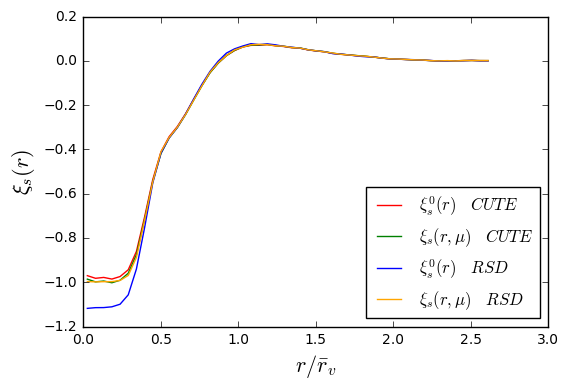

In [369]:
xi_0 = (1 + (beta1/3))* RealSpdg_mean

plt.plot(rvals/np.mean(void_cat[:,4]), monopole, color = 'red', label = r'$\xi_{s}^{0}(r) \quad CUTE$')
plt.plot(rvals/np.mean(void_cat[:,4]), np.mean(xi_rmu, axis = 1), color = 'green', 
         label = r'$\xi_{s}(r, \mu) \quad CUTE$')

plt.plot(rvals/np.mean(void_cat[:,4]), xi_0, color = 'blue', label = r'$\xi_{s}^{0}(r) \quad RSD$')
plt.plot(rvals/np.mean(void_cat[:,4]), RedSpdg_mean, color = 'orange', label = r'$\xi_{s}(r, \mu) \quad RSD$')
plt.legend(loc = 4)
plt.xlabel(r'$r/\bar{r}_{v}$', size = '16')
plt.ylabel(r'$\xi_{s}(r)$', size = '16')
plt.show()

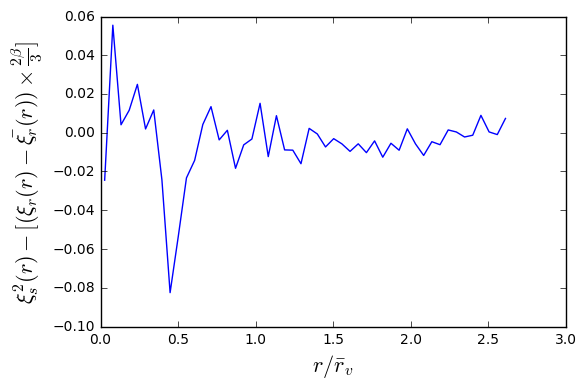

In [632]:
plt.plot(rvals/np.mean(void_cat[:,4]), quadrupole - xi_diff_real*(2*beta1)/3)
plt.xlabel(r'$r/\bar{r}_{v}$', size = '16')
plt.ylabel(r'$\xi_{s}^{2}(r) - [(\xi_{r}(r) - \bar{\xi_{r}}(r)) \times \frac{2\beta}{3}]$', size = '16')
plt.show()